In [86]:
import pandas as pd 
# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [88]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [89]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [90]:
def clean_df(df, column_names, threshold = 10):
    for column_name in column_names:
        titles = list(df[column_name])
        di = {}

        for title in titles:
            if title not in di:
                di[title] = 1
            else:
                di[title] += 1

        li = [key for (key, value) in di.items() if value < threshold]

        print(li)
        for name in li:
             mask = df[column_name] == name
             df = df[~mask]

    return df

column_names = ['fixed acidity', 'volatile acidity', 'citric acid']

df_cleaned = clean_df(df = df, column_names = column_names)
print(len(df_cleaned))
print(len(df))


[11.2, 5.2, 5.7, 4.6, 9.7, 5.0, 4.7, 5.8, 5.4, 12.8, 11.0, 12.0, 15.0, 11.1, 12.5, 11.8, 10.9, 11.4, 13.3, 13.4, 12.4, 12.2, 13.8, 13.5, 12.6, 14.0, 13.7, 12.7, 12.3, 15.6, 5.3, 11.3, 13.0, 12.9, 14.3, 15.5, 11.7, 13.2, 15.9, 12.1, 5.1, 4.9, 5.9, 5.5]
[0.88, 0.76, 0.615, 0.22, 0.71, 0.645, 0.675, 0.655, 0.605, 0.935, 0.735, 0.725, 0.705, 0.785, 0.75, 0.625, 0.775, 0.9, 0.545, 0.575, 1.07, 0.695, 1.33, 0.745, 1.04, 0.415, 0.95, 0.885, 0.805, 0.73, 1.09, 0.635, 0.82, 1.0, 0.975, 0.87, 0.18, 0.83, 0.77, 0.815, 0.795, 0.665, 0.21, 0.765, 0.85, 0.84, 0.96, 0.23, 0.315, 0.365, 0.25, 0.825, 0.72, 0.595, 0.585, 0.915, 0.835, 0.755, 0.845, 1.24, 0.8, 0.98, 1.185, 0.92, 1.02, 1.035, 1.025, 0.565, 0.74, 1.115, 0.865, 0.875, 0.965, 0.91, 0.89, 0.305, 0.395, 0.12, 0.86, 1.005, 0.19, 0.2, 0.955, 0.16, 1.58, 0.79, 1.18, 0.475, 0.81, 0.895, 0.855]
[0.56, 0.51, 0.11, 0.16, 0.52, 0.57, 0.64, 0.7, 0.68, 0.55, 1.0, 0.05, 0.6, 0.76, 0.66, 0.71, 0.59, 0.58, 0.69, 0.65, 0.63, 0.73, 0.54, 0.43, 0.78]
1009
159

/tmp/ipykernel_34/1849891262.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cls_names, rotation = 60)


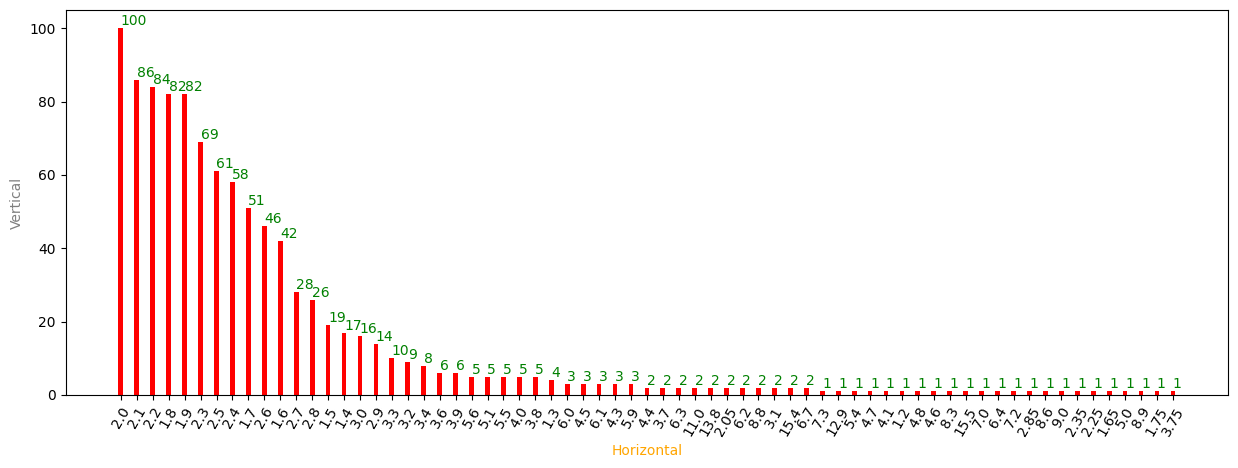

In [91]:
from matplotlib import pyplot as plt
import numpy as np

def data_analysis(df, column_name, color,text_height = 0.02, text_width = 0.05):
    counts = df[column_name].value_counts().values 
    cls_names = df[column_name].value_counts().keys()
    width, text_width, text_height = 0.3, text_width , 0.8
    fig, ax = plt.subplots(figsize = (15,5))
    indices = np.arange(len(counts))

    ax.bar(indices, counts, width, color = color)
    ax.set_xlabel("Horizontal", color = "orange")
    ax.set_xticklabels(cls_names, rotation = 60)
    ax.set(xticks = indices, xticklabels = cls_names)
    ax.set_ylabel('Vertical', color = 'grey')

    for i, v in enumerate(counts):  ax.text(i - text_width, v + text_height, str(v), color = "green")

data_analysis(df = df_cleaned, column_name = "residual sugar", color = "red", text_width = 0.005)

In [92]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


/tmp/ipykernel_34/1849891262.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cls_names, rotation = 60)


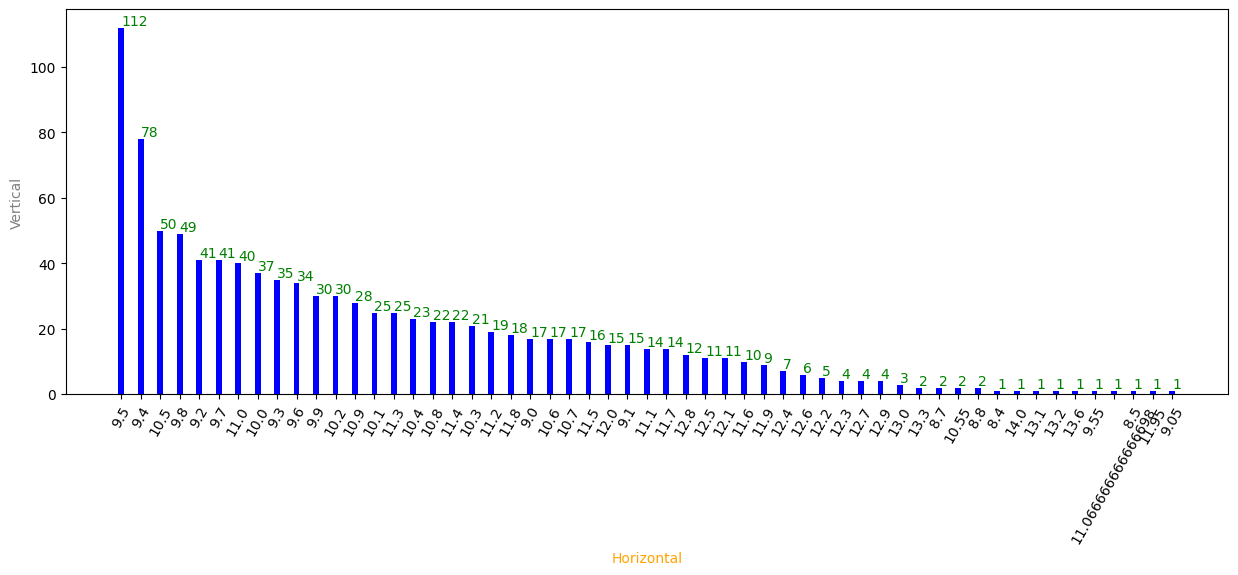

In [93]:
data_analysis(df = df_cleaned, column_name = "alcohol", color = "blue", text_width = 0.005)

/tmp/ipykernel_34/1849891262.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(cls_names, rotation = 60)


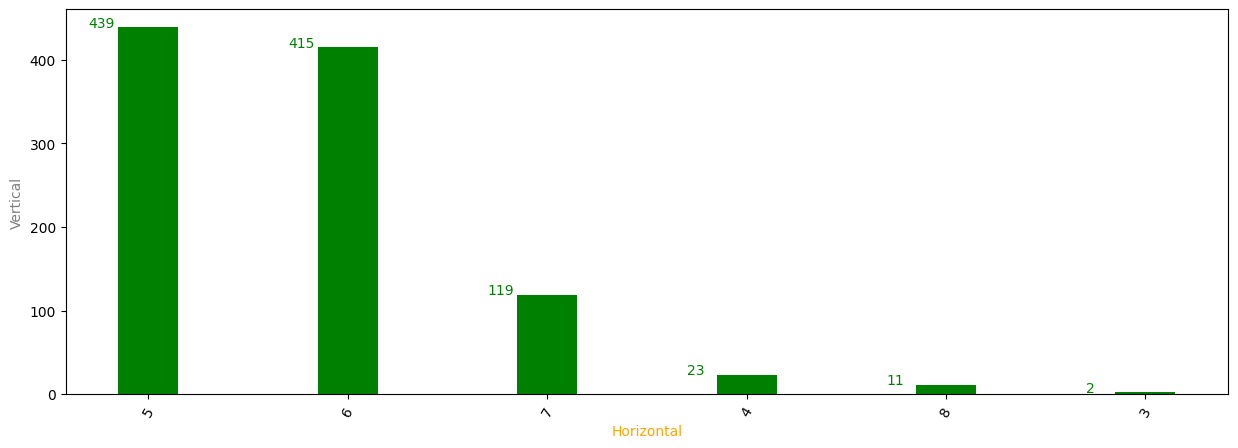

In [94]:
data_analysis(df = df_cleaned, column_name = "quality", color = "green", text_width = 0.3)

In [95]:
x = df.drop([ 'volatile acidity', 'citric acid'], axis = 1)
x

,fixed acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [96]:
x = df.iloc[:,[3,-1]]
x

,residual sugar,quality
0,1.9,5
1,2.6,5
2,2.3,5
3,1.9,6
4,1.9,5
...,...,...
1594,2.0,5
1595,2.2,6
1596,2.3,6
1597,2.0,5


In [97]:
from sklearn.cluster import KMeans

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'Elbow - Method')

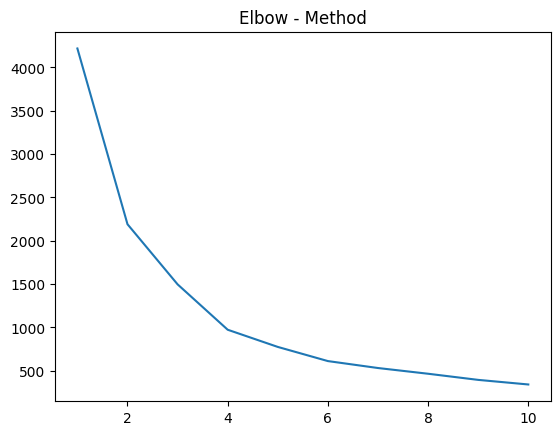

In [40]:
inertias = []
for number_clusters in range(1, 11):
    km = KMeans(n_clusters = number_clusters)
    km.fit_predict(x)
    inertias.append(km.inertia_)
    from matplotlib import pyplot as plt
plt.plot(range(1, 11), inertias)
plt.title("Elbow - Method")

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


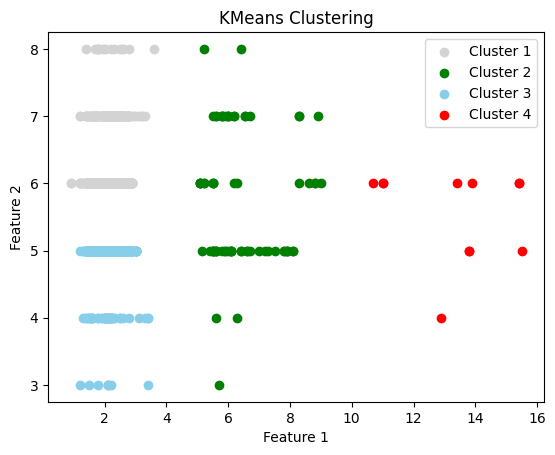

In [99]:
km = KMeans(n_clusters = 5)
y_means = km.fit_predict(x)
y_means
plt.scatter(x.iloc[y_means == 0, 0], x.iloc[y_means == 0, 1], color='lightgrey', label='Cluster 1')
plt.scatter(x.iloc[y_means == 1, 0], x.iloc[y_means == 1, 1], color='green', label='Cluster 2')
plt.scatter(x.iloc[y_means == 2, 0], x.iloc[y_means == 2, 1], color='skyblue', label='Cluster 3')
plt.scatter(x.iloc[y_means == 3, 0], x.iloc[y_means == 3, 1], color='red', label='Cluster 4')

plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()


In [100]:
df["label"] = y_means
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [101]:
df_new = df
X = df_new.iloc[:,  : 11] 
y = df_new.iloc[:, -1] 
X[:10]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5


In [102]:
y

0       2
1       2
2       2
3       0
4       2
       ..
1594    2
1595    0
1596    0
1597    2
1598    4
Name: label, Length: 1599, dtype: int32

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
X_test_all, X_train, y_test_all, y_train = train_test_split(X, y, test_size = 0.8)
X_test_all, X_validation, y_test_all, y_validation = train_test_split(X, y, test_size = 0.1)
X_test_all, X_test, y_test_all, y_test = train_test_split(X, y, test_size = 0.1)
print(len(X_train))
print(len(X_validation))
print(len(X_test))

1280
160
160


In [106]:
X_train_encoded = pd.get_dummies(X_train)

In [109]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

classifier = GradientBoostingClassifier(n_estimators=1000)
classifier.fit(X_train_imputed, y_train)

GradientBoostingClassifier(n_estimators=1000)

In [115]:
from sklearn.metrics import accuracy_score


X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
bashoratlar = classifier.predict(X_test_imputed)
acc = accuracy_score(y_true=y_test, y_pred=bashoratlar)
print(f"Modelning aniqlilik bahosi -> {acc:.3f}")

Modelning aniqlilik bahosi -> 0.963
